In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats

plt.rcParams["figure.figsize"] = (10,3)

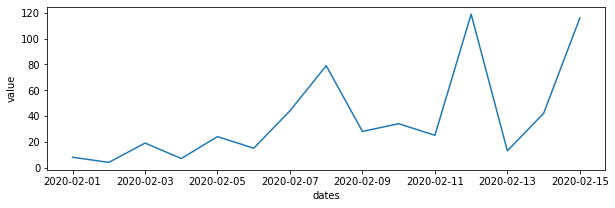

In [9]:
df_index = pd.date_range('2020-02-01', '2020-02-15').rename('dates')

start = 10
vals = []
for i in range(len(df_index)):
    vals.append(np.random.choice(range(start-start,start)))
    start+=10
    
df = pd.DataFrame({'value':vals}, index=df_index)

sns.lineplot(x=df.index, y=df.value)
plt.show()
    

In [10]:
df['ewma'] = df.ewm(span=3).mean()

In [11]:
## shift values to get columns showing previous days' values then calculate the residuals
lag = 1
df['t-1'] = df.value.shift(lag)
df[f't-{lag}_resid'] = df['value'] - df[f't-{lag}']

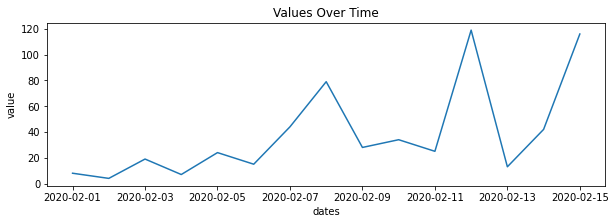

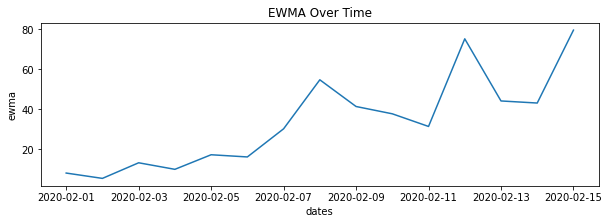

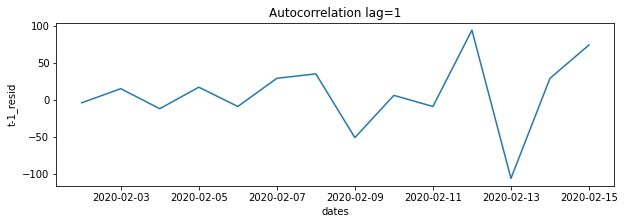

In [15]:

sns.lineplot(x=df.index, y=df.value)
plt.title('Values Over Time')
plt.show()

sns.lineplot(x=df.index, y=df.ewma)
plt.title('EWMA Over Time')
plt.show()

sns.lineplot(x=df.index, y=df[f't-{lag}_resid'])
plt.title(f'Autocorrelation lag={lag}')
plt.show()

In [13]:
import statsmodels.tsa.stattools as smtsa

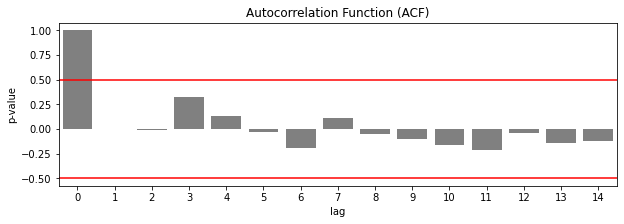

In [14]:
## autocorrelation function ACF
acf = smtsa.acf(df.value, nlags=15)
lags = [i for i, val in enumerate(acf)]

sns.barplot(x=lags, y=acf, color='grey')
plt.axhline(y=0.5, c='red')
plt.axhline(y=-0.5, c='red')
plt.title('Autocorrelation Function (ACF)')
plt.ylabel('p-value')
plt.xlabel('lag')
plt.show()